In [1]:
from qiskit import *

In [2]:
import matplotlib

In [3]:
#Create a new generic register. 
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr,cr)

In [6]:
%matplotlib inline

In [7]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [8]:
circuit.h(qr[0])

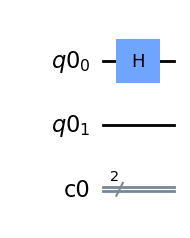

In [9]:
circuit.draw(output='mpl')

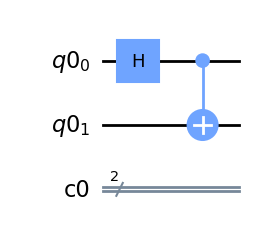

In [11]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

In [12]:
circuit.measure(qr,cr)

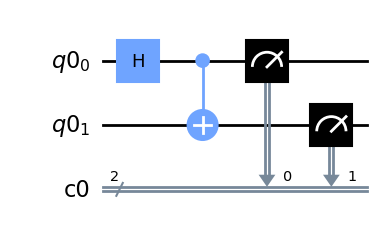

In [14]:
circuit.draw(output='mpl')

# Simulating circuit on local device

In [17]:
#QASM - quantum assembly language

simulator = Aer.get_backend('qasm_simulator')

In [18]:
#execute the circuit

res = execute(circuit, backend=simulator).result()

In [19]:
from qiskit.tools.visualization import plot_histogram

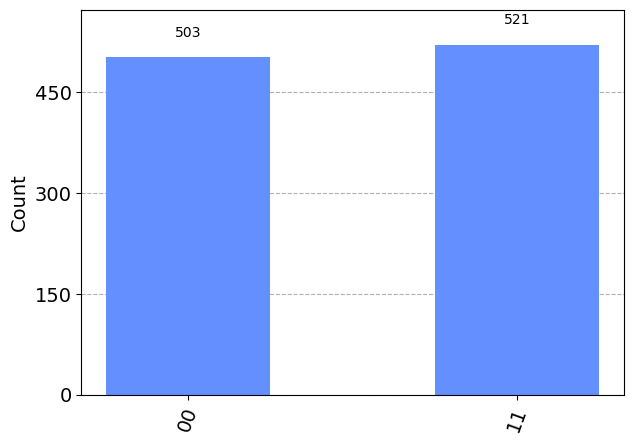

In [20]:
plot_histogram(res.get_counts(circuit))

# Simulation same circuit on a QC 

In [22]:
IBMQ.load_account()

/var/folders/nw/whndd4zx0yq8ggmr1g5hhd5m0000gn/T/ipykernel_96831/485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/nw/whndd4zx0yq8ggmr1g5hhd5m0000gn/T/ipykernel_96831/485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
#List of backend providers

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

ibmqfactory.load_account:WARNING:2023-09-05 02:15:21,959: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [25]:
provider = IBMQ.get_provider('ibm-q')

In [34]:
qcomp = provider.get_backend('ibmq_qasm_simulator')

In [35]:
job = execute(circuit, backend = qcomp)

In [36]:
from qiskit.tools.monitor import job_monitor

In [37]:
job_monitor(job)

Job Status: job has successfully run


In [38]:
result = job.result()


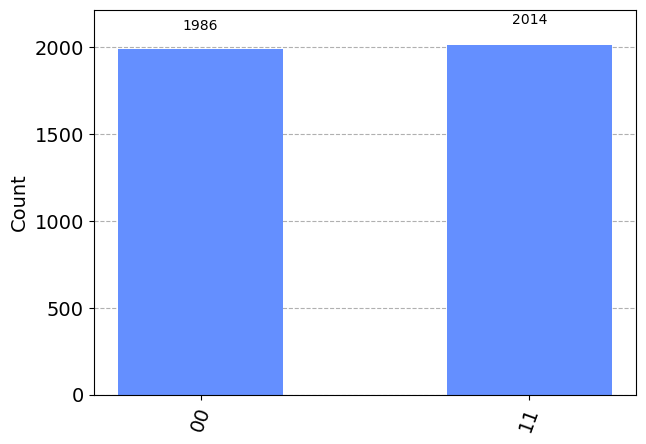

In [39]:
plot_histogram(result.get_counts(circuit))